In [1]:
import gym
from stable_baselines3 import PPO, DQN
from datetime import datetime
env = gym.make("gym_xymodel:isingmodel-v0")
# env = gym.make('CartPole-v1')


In [2]:
date = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=f"results/tensorboard/{date}")
model.learn(total_timesteps=100000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to results/tensorboard/2022-02-20_00-19-44/PPO_1
-----------------------------
| time/              |      |
|    fps             | 395  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 263          |
|    iterations           | 2            |
|    time_elapsed         | 15           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0084131155 |
|    clip_fraction        | 0.0581       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.77        |
|    explained_variance   | -0.0118      |
|    learning_rate        | 0.0003       |
|    loss                 | 13           |
|    n_updates            | 10      

In [3]:
model.save(f"results/{date}_isingmodelSB_4x4")

In [13]:
model = PPO.load("results/2022-02-20_00-02-28_isingmodelSB_3x3")

reward=8
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


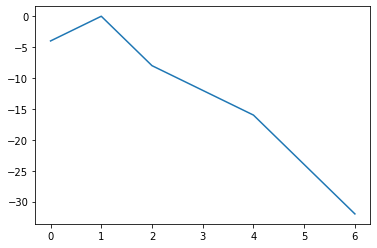

In [20]:
energies = []
obs = env.reset()
for i in range(15):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    energies.append(info["energy"])
    if done:
      print(f"{reward=}")
      env.render()
      break
      # env.reset()
    # if i % 100 == 0:
    #   print(f"{i=}, {reward=}")
    #   env.render()

import matplotlib.pyplot as plt
plt.plot(range(len(energies)),energies)

In [7]:
obs = env.reset()
env.render()
for i in range(10):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    print(f"{i=}, {action=} {reward=}, {env.compute_energy()=}")
    env.render()

[[-1  1]
 [ 1  1]]
i=0, action=1 reward=-8, env.compute_energy()=0
[[-1 -1]
 [ 1  1]]
i=1, action=3 reward=0, env.compute_energy()=0
[[-1 -1]
 [ 1 -1]]
i=2, action=2 reward=8, env.compute_energy()=-8
[[-1 -1]
 [-1 -1]]
i=3, action=0 reward=-8, env.compute_energy()=0
[[ 1 -1]
 [-1 -1]]
i=4, action=0 reward=8, env.compute_energy()=-8
[[-1 -1]
 [-1 -1]]
i=5, action=0 reward=-8, env.compute_energy()=0
[[ 1 -1]
 [-1 -1]]
i=6, action=0 reward=8, env.compute_energy()=-8
[[-1 -1]
 [-1 -1]]
i=7, action=0 reward=-8, env.compute_energy()=0
[[ 1 -1]
 [-1 -1]]
i=8, action=0 reward=8, env.compute_energy()=-8
[[-1 -1]
 [-1 -1]]
i=9, action=0 reward=-8, env.compute_energy()=0
[[ 1 -1]
 [-1 -1]]
